In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("D:/Project/INT 254/data/train.csv")
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape


(10886, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [6]:
parts = df["datetime"].str.split(" ", n=2, expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2011,0
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2011,1
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2011,2
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2011,3
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2011,4


In [7]:
parts = df["date"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2011,0,1,1,2011
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2011,1,1,1,2011
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2011,2,1,1,2011
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2011,3,1,1,2011
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2011,4,1,1,2011


In [8]:
from datetime import datetime
import calendar


def weekend_or_weekday(year, month, day):

	d = datetime(year, month, day)
	if d.weekday() > 4:
		return 0
	else:
		return 1


df['weekday'] = df.apply(lambda x:
						weekend_or_weekday(x['year'],
											x['month'],
											x['day']),
						axis=1)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2011,0,1,1,2011,0
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2011,1,1,1,2011,0
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2011,2,1,1,2011,0
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2011,3,1,1,2011,0
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2011,4,1,1,2011,0


In [9]:
def am_or_pm(x):
	if x > 11:
		return 1
	else:
		return 0


df['am_or_pm'] = df['time'].apply(am_or_pm)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2011,0,1,1,2011,0,0
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2011,1,1,1,2011,0,0
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2011,2,1,1,2011,0,0
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2011,3,1,1,2011,0,0
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2011,4,1,1,2011,0,0


In [10]:
from datetime import date
import holidays


def is_holiday(x):

	india_holidays = holidays.country_holidays('IN')

	if india_holidays.get(x):
		return 1
	else:
		return 0


df['holidays'] = df['date'].apply(is_holiday)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm,holidays
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2011,0,1,1,2011,0,0,0
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2011,1,1,1,2011,0,0,0
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2011,2,1,1,2011,0,0,0
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2011,3,1,1,2011,0,0,0
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2011,4,1,1,2011,0,0,0


In [11]:
df.drop(['datetime', 'date'],
		axis=1,
		inplace=True)


In [12]:
df.isnull().sum()


season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
time          0
day           0
month         0
year          0
weekday       0
am_or_pm      0
holidays      0
dtype: int64

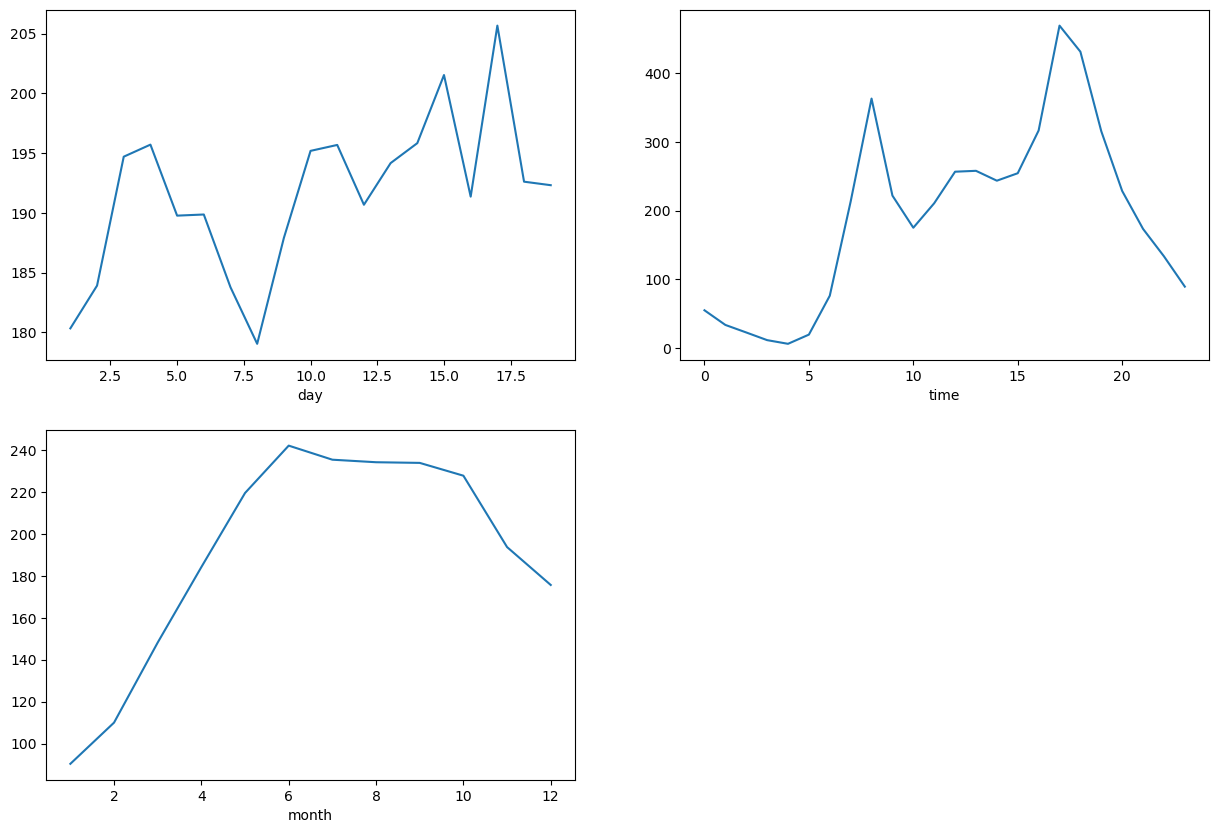

In [13]:
features = ['day', 'time', 'month']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
	plt.subplot(2, 2, i + 1)
	df.groupby(col).mean()['count'].plot()
plt.show()



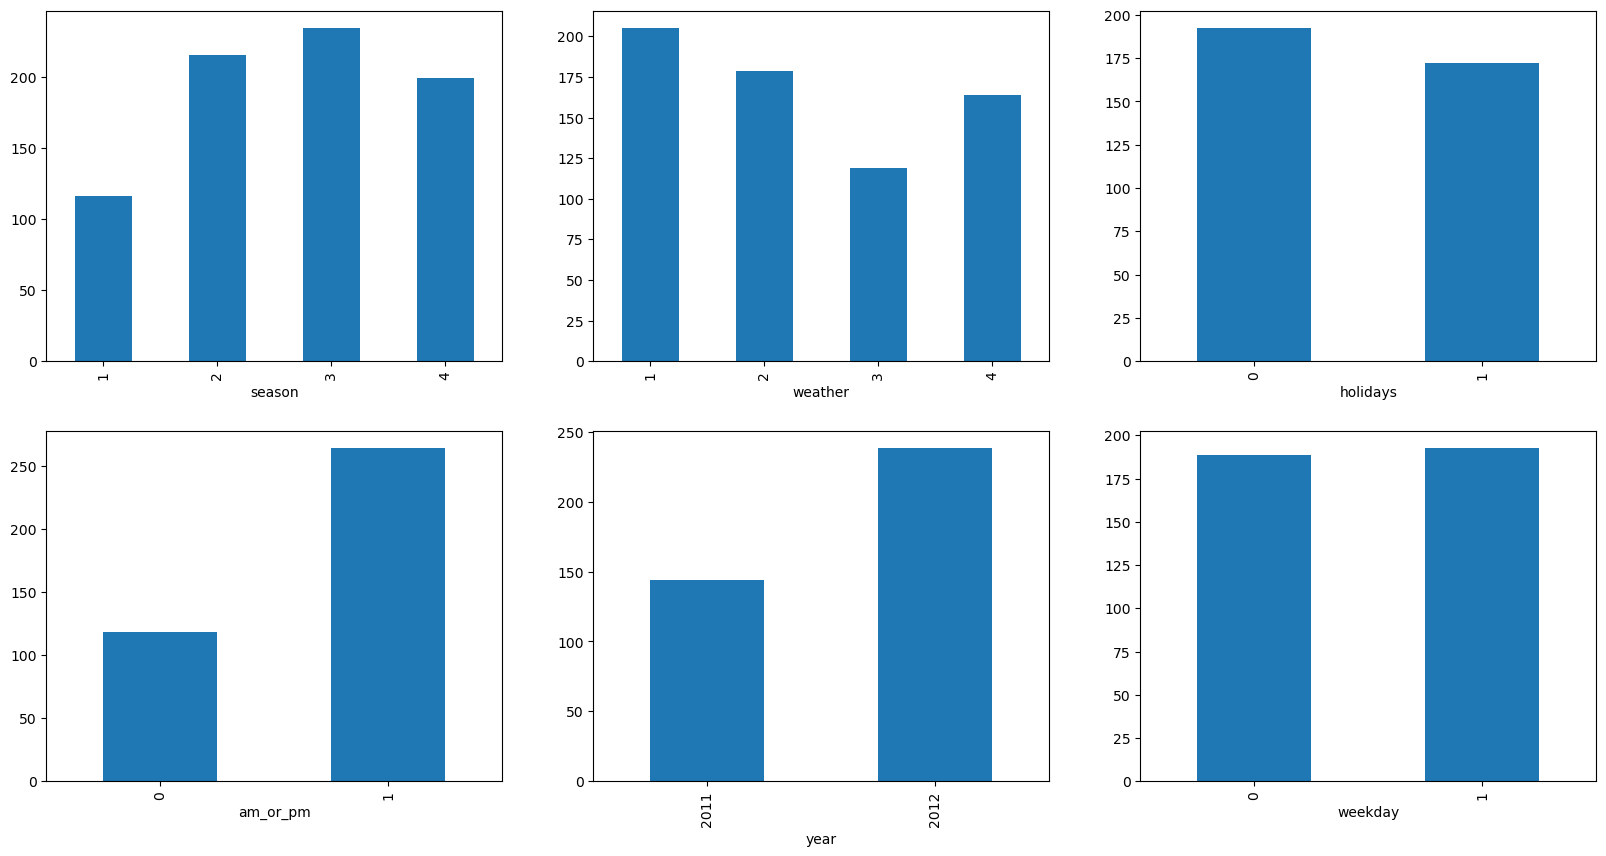

In [14]:
features = ['season', 'weather', 'holidays',
			'am_or_pm', 'year', 'weekday']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(2, 3, i + 1)
	df.groupby(col).mean()['count'].plot.bar()
plt.show()


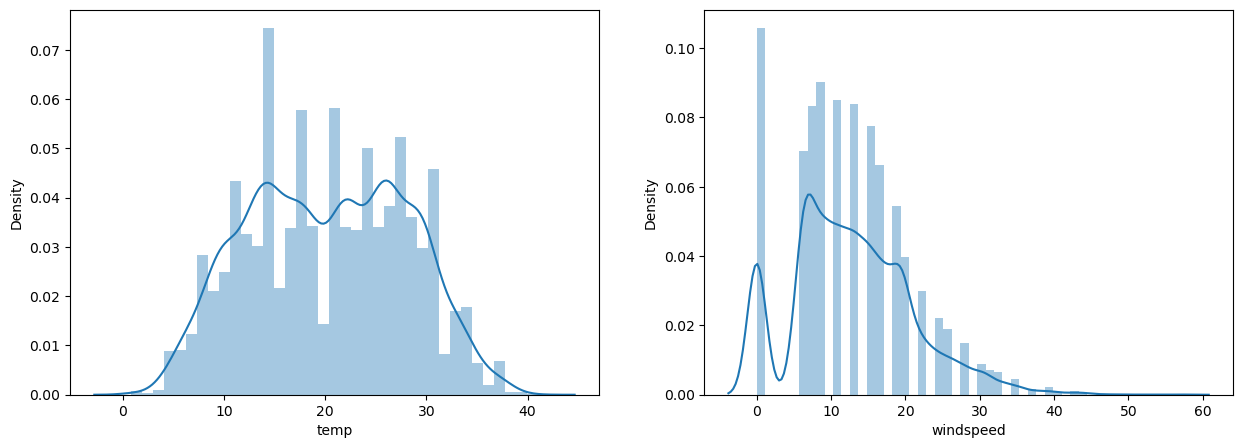

In [15]:
features = ['temp', 'windspeed'] 
  
plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
  plt.subplot(1, 2, i + 1) 
  sb.distplot(df[col]) 
plt.show()

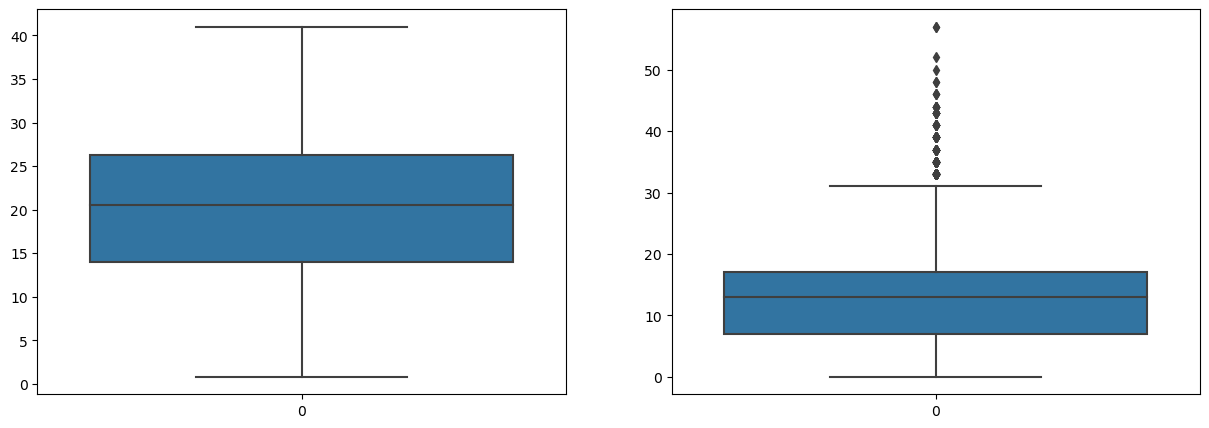

In [16]:
features = ['temp', 'windspeed'] 
  
plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
  plt.subplot(1, 2, i + 1) 
  sb.boxplot(df[col]) 
plt.show()

In [17]:
num_rows = df.shape[0] - df[df['windspeed']<32].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')


Number of rows that will be lost if we remove outliers is equal to 227.


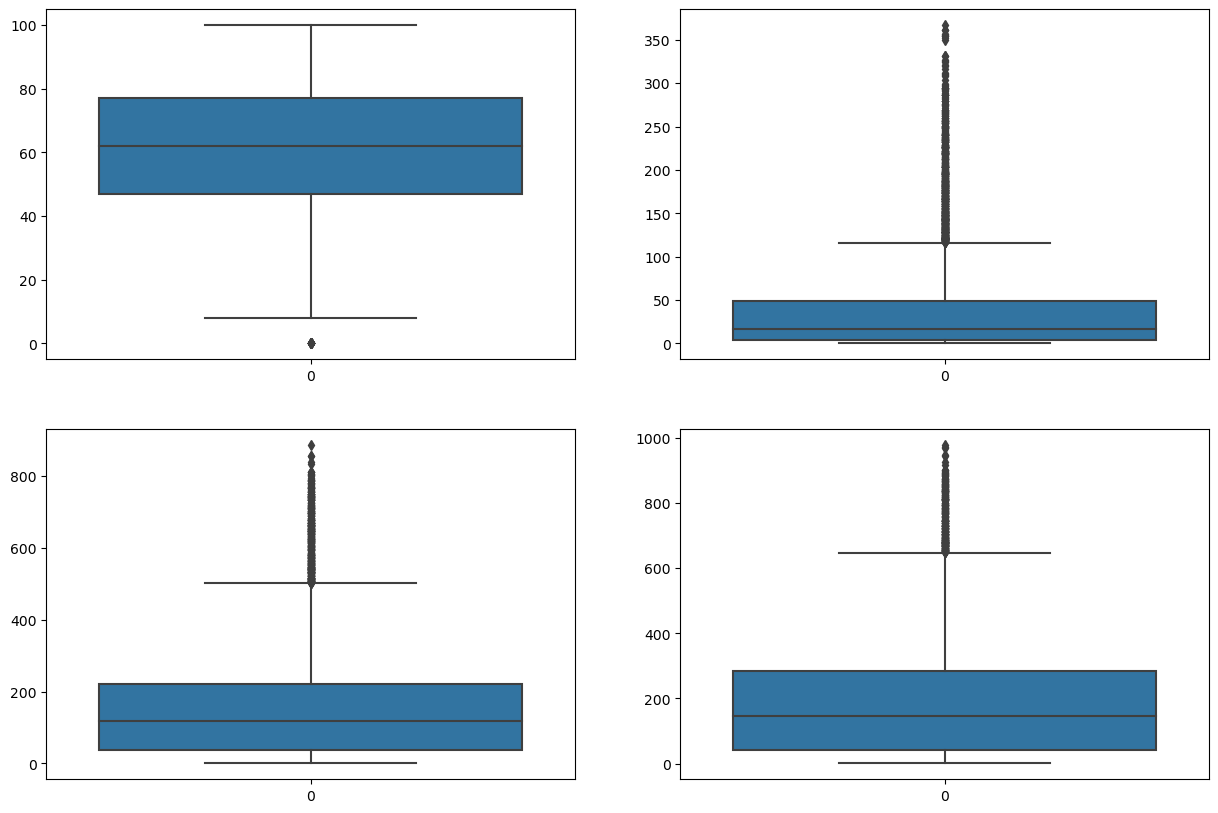

In [18]:
features = ['humidity', 'casual', 'registered', 'count'] 
  
plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    sb.boxplot(df[col]) 
plt.show() 

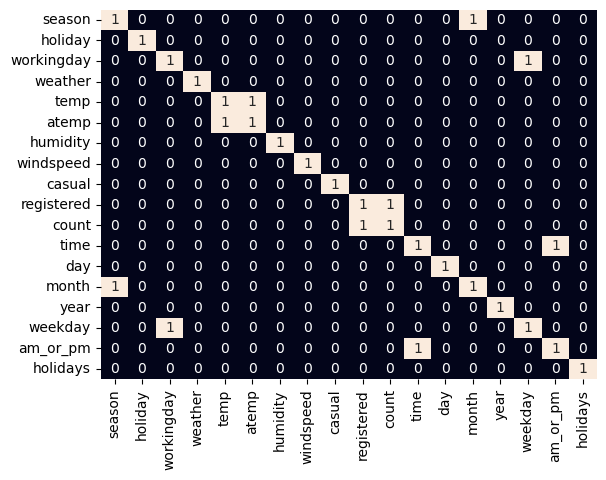

In [19]:
sb.heatmap(df.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


In [20]:
df.drop(['registered', 'time'], axis=1, inplace=True)
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]


In [21]:
features = df.drop(['count'], axis=1)
target = df['count'].values

X_train, X_val, Y_train, Y_val = train_test_split(features,
												target,
												test_size = 0.4,
												random_state=22)
X_train.shape, X_val.shape


((6382, 15), (4256, 15))

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [23]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), Lasso(),
		RandomForestRegressor(), Ridge()]

for i in range(4):
	models[i].fit(X_train, Y_train)

	print(f'{models[i]} : ')

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(Y_train, train_preds))

	val_preds = models[i].predict(X_val)
	print('Validation Error : ', mae(Y_val, val_preds))
	print()


LinearRegression() : 
Training Error :  81.71087155482998
Validation Error :  80.77788583061789

Lasso() : 
Training Error :  82.00667684520772
Validation Error :  81.13867334722315

RandomForestRegressor() : 
Training Error :  23.179380745325396
Validation Error :  59.71778326582826

Ridge() : 
Training Error :  82.34633864187711
Validation Error :  81.44929350022257



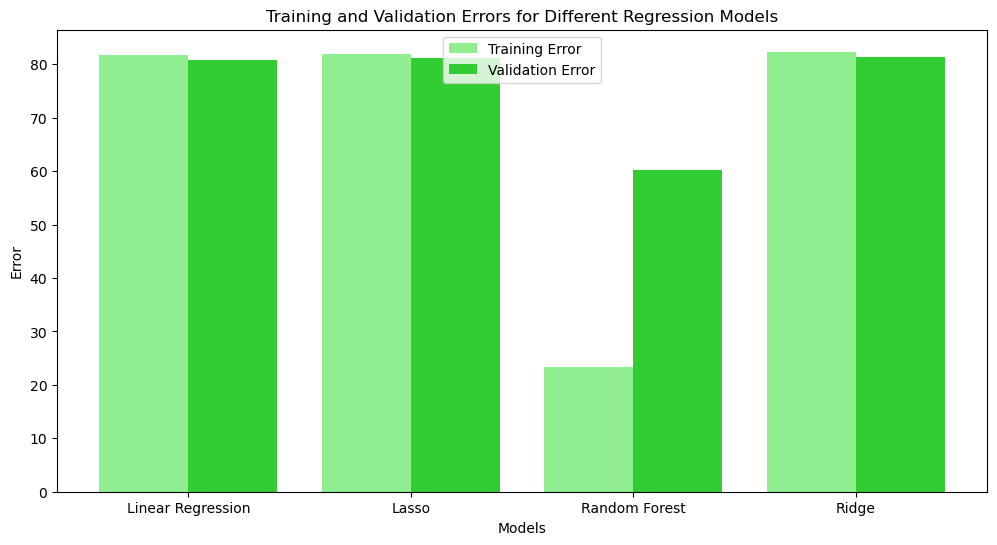

In [24]:
models = ['Linear Regression', 'Lasso', 'Random Forest', 'Ridge']
training_errors = [81.71087155482998, 82.00667684520772,  23.254647916635577, 82.34633864187711]
validation_errors = [80.77788583061789, 81.13867334722315,   60.13501810515872, 81.44929350022257]

x = range(len(models))

plt.figure(figsize=(12, 6))
plt.bar(x, training_errors, width=0.4, label='Training Error',color = 'lightgreen')
plt.bar([i + 0.4 for i in x], validation_errors, width=0.4, label='Validation Error',color = 'limegreen')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Training and Validation Errors for Different Regression Models')
plt.xticks([i + 0.2 for i in x], models)
plt.legend()
plt.show()